<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Supervised_Regression/VolcanoEruption/src/Predict_Volcanic_Eruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stage 1: Load the datasets from the source files.

In [2]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [82]:
import os
import pandas as pd
from matplotlib import pyplot as plt

def clear_contents(index, obs, list1, list2, dataFrame):
  index = 0
  obs = []
  list1 = []
  list2 = []
  dataFrame = dataFrame.iloc[0:0]
  return index, obs, list1, list2, dataFrame

def readDataSets():
  #os.chdir('/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset')
  # Specify the directory containing the subfolders and files
  root_folder_path = '/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset'
  observations = []
  index = 0
  array1 = []
  array2 = []
  dataFrames_list = []
  # Walk through the directory tree
  for subdir, dirs, files in os.walk(root_folder_path):
      for dir_file in files:
          file_path = os.path.join(subdir, dir_file)
          #print(file_path)
          if file_path.endswith('.txt'):
            with open(file_path, 'r') as file:
              for line in file:
                if line.strip():  # Ignore empty lines
                  index += 1
                  if index == 12:
                    array1 = line.split(',')
                  elif index == 13:
                    array2 = line.split(',')
                  else:
                    key, value = line.split(',', 1)
                    observations.append({key.strip(): value.strip()})

              # Display the parsed observations
              #for observation in observations:
                #print(observation)
              dataFrame = pd.DataFrame({'TimeSteps':array1,'Tilt_Value': array2})
              dataFrame[['TimeSteps','Tilt_Value']] = dataFrame[['TimeSteps','Tilt_Value']].astype(float)
              #dataFrame.set_index('TimeSteps')
              dataFrames_list.append(dataFrame)
              index, observations, array1, array2, dataFrame = clear_contents(index, observations, array1, array2, dataFrame)
              print(len(dataFrames_list))
              print('\n File 1:'+file_path+' completed.'  + '='*10 + '\n')  # Separator between files

  return dataFrames_list

1

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation3.txt completed.==========

2

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation4.txt completed.==========

3

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation2.txt completed.==========

4

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation5.txt completed.==========

5

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation11.txt completed.==========

6

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation9.txt completed.==========

7

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano1/observation12.txt completed.==========

8

 File 1:/content/MachineLearn

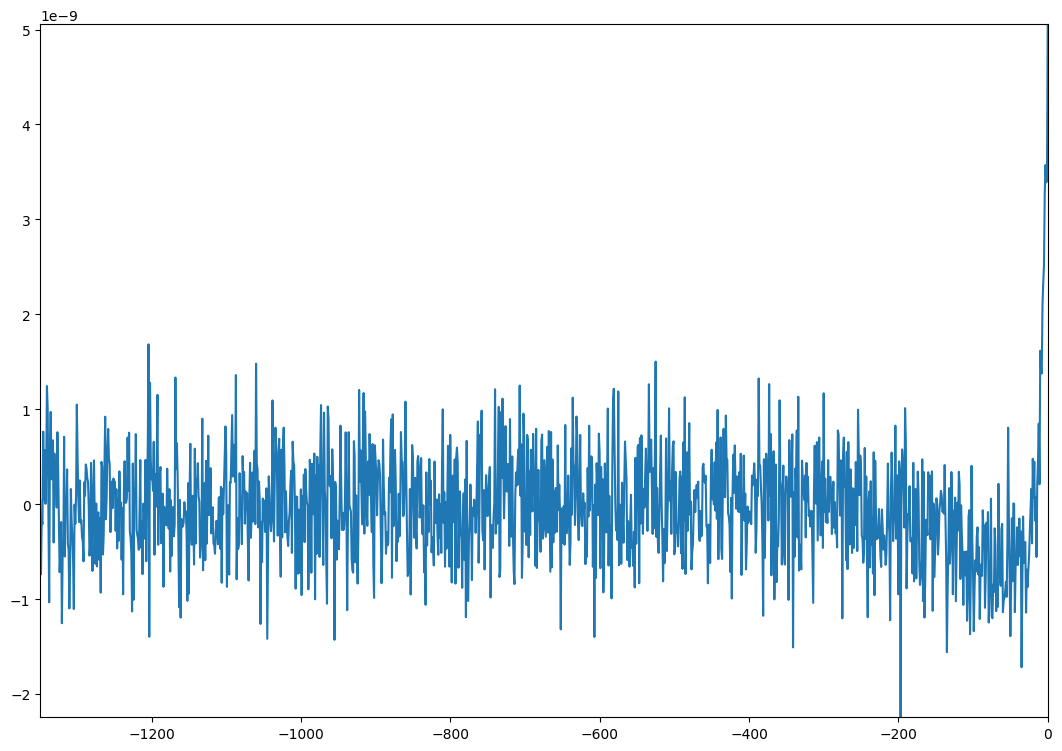

In [83]:
dataFrames = readDataSets()

In [85]:
from pandas.plotting import autocorrelation_plot

def plot_the_dataframes(dataFrames):
  #print(dataFrames[188].describe())
  #fig_size = plt.rcParams["figure.figsize"] #Get current size
  #fig_size[0] = 13                         #Set figure width to 13 and height to 9
  #fig_size[1] = 9
  #plt.rcParams["figure.figsize"] = fig_size

  #autocorrelation_plot(dataFrames[5])
  plt.ylim(min(dataFrames[5]['Tilt_Value']), max(dataFrames[5]['Tilt_Value']))
  plt.xlim(min(dataFrames[5]['TimeSteps']), max(dataFrames[5]['TimeSteps']))
  plt.plot(dataFrames[5]['TimeSteps'], dataFrames[5]['Tilt_Value'])
  plt.show()

Stage 2: EDA:

1. Visualize the data frames to undestand the data and patterns - Seasonality and Trends.
2. Perform Stationarity and measure using plot and AD Fuller Test.

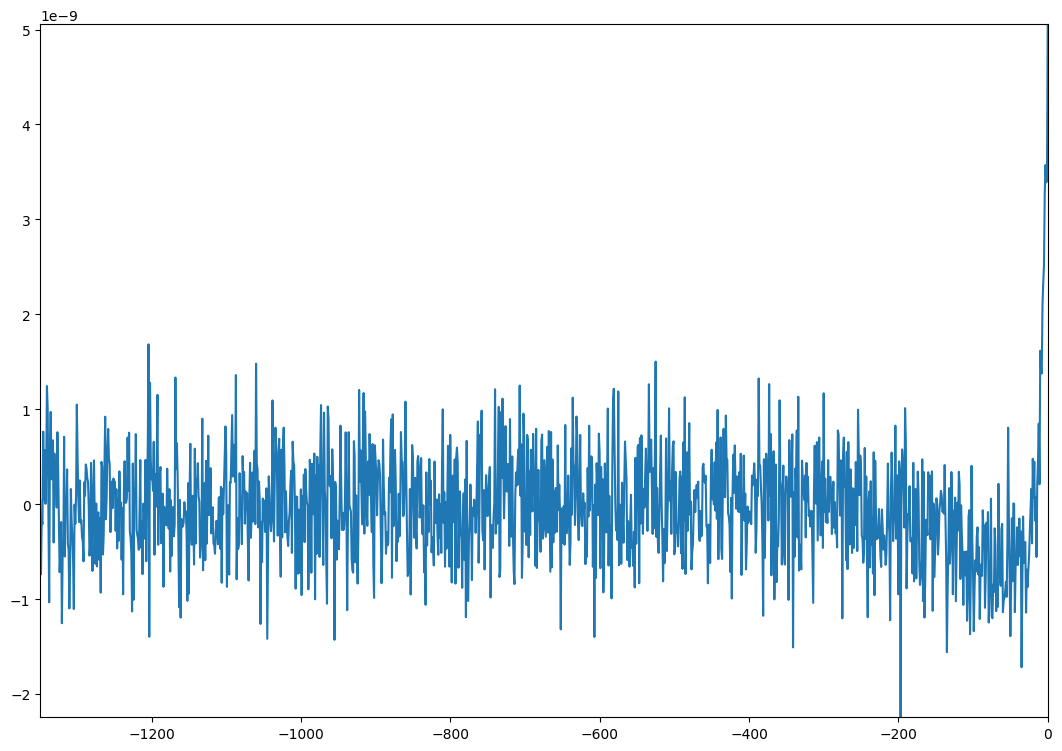

In [86]:
plot_the_dataframes(dataFrames)

Stage 3: Modelling Algorithm #1: ARIMA.

In [ ]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(dataFrames[5]['Tilt_Value'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [128]:
# Split the dataset to training, test and predict.
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = dataFrames[5].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
df = pd.DataFrame([x for x in train])
df.columns = ['TimeSteps','Tilt_Value']
df[['TimeSteps','Tilt_Value']] = df[['TimeSteps','Tilt_Value']].astype(float)
predictions = list()
# walk-forward validation
for t in range(len(test)):
 print(df.shape)
 model = ARIMA(df['1'], order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

(891, 2)


KeyError: '1'